# MATH 210 Introduction to Mathematical Computing

## March 20, 2017

1. Solving first order ODEs with SciPy
    * Simple examples
    * Logistic equation
2. Solving second order ODEs with SciPy
    * Write a second order equation as a first order system
    * Simple examples
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Solving first order ODEs with SciPy

The main ODE solver in SciPy is `scipy.integrate.odeint.` Last time, we saw that it takes at least 3 input parameters:

* a function `f` defining the right side of a first order equation $y' = f(y,t)$
* initial condition(s) `y0`
* an array `t` of $t$ values where we solve for $y(t)$

Let's import `scipy.integrate` and do some examples:

In [2]:
import scipy.integrate as spi

### Example

Plot the solution of $y' = y^2 - t^2$ with initial condition $y(0) = 1$ for $t \in [0,1]$.

In [3]:
# Define the right side of the ODE
def f(y,t):
    return y**2 - t**2

In [4]:
# Define the initial condition
y0 = 1

In [5]:
# Array of t values
t = np.linspace(0,1,100)

In [6]:
# Compute the solution
y = spi.odeint(f,y0,t)

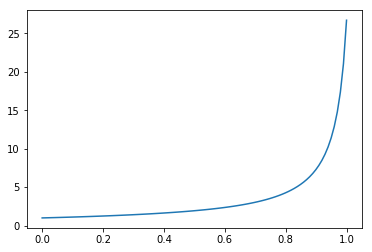

In [7]:
# Plot the numerical solution
plt.plot(t,y);

### Example

The [logistic equation](https://en.wikipedia.org/wiki/Logistic_function) $y' = y(1-y)$, $y(0) = k_0$.

Let's plot the solutions to the logistic equation for different intial conditions.

In [8]:
def f(y,t):
    return y*(1 - y)

In [9]:
y0 = np.arange(0,3,0.2)

In [10]:
t = np.linspace(0,5,100)

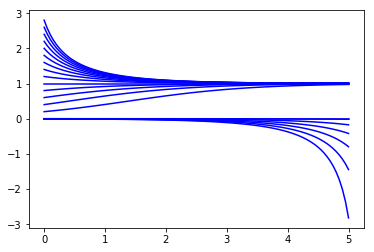

In [11]:
# Plot solutions given initial condition y(0) in the range [0,3]
for y00 in y0:
    y = spi.odeint(f,y00,t)
    plt.plot(t,y,'b')

# Plot solutions given initial condition y(0) in the range [-0.005,0]
for y00 in [-0.0001, -0.001, -0.002, -0.003, -0.004, -0.005]:
    y = spi.odeint(f,y00,t)
    plt.plot(t,y,'b')

Notice the steady state solutions $y = 1$ (stable steady state) and $y = 0$ (unstable steady state).

## 2. Solving second order ODEs with SciPy

All numerical ODE solvers (in MATLAB, Python, etc.) require the user to write their equations as a system of first order differential equations. How do we write a second order equation as a first order system? Introduce a new variable for each derivative of the unknown function(s) up to one less than the order of the equation.

### Example

To rewrite the second order equation $y'' + y = 0$ as a first order system, we introduce two new variables $u_0$ and $u_1$ for $y$ and $y'$.

$$
\begin{align}
u_0 &= y \\
u_1 &= y'
\end{align}
$$

We can rewrite the second order equation $y'' + y = 0$ as a first order system in terms of $u_0$ and $u_1$:

\begin{align}
u_0' &= u_1 \\
u_1' &= -u_0
\end{align}

So now, in vector notation, our system of equations is

$$
\frac{d \mathbf{u}}{dt} = \mathbf{f}(\mathbf{u},t)
$$

where $\mathbf{u} = \begin{bmatrix} u_0 \\ u_1 \end{bmatrix}$ and

$$
\mathbf{f}(\mathbf{u},t) = \begin{bmatrix} u_1 \\ -u_0 \end{bmatrix}
$$

Let's solve the system for initial conditions $u_0(0) = 1$ and $u_1(0) = 0$.

In [12]:
# Define the vector function f(y,t) which gives the right side of the sytem
def f(u,t):
    return [ u[1], -u[0] ]

In [13]:
# The initial conditions 
u0 = [1,0]

In [14]:
# Define the array of t values
t = np.linspace(0,2*np.pi,100)

In [15]:
# Compute the solution
U = spi.odeint(f,u0,t)

In [16]:
U.shape

(100, 2)

$U$ is an array with 2 columns: the first column is $u_0(t)$ (which is $y(t)$) and the second column is $u_1(t)$ (which is $y'(t)$)

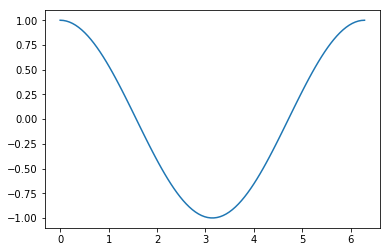

In [17]:
# Plot the first column of U. These are the y values for each t value
plt.plot(t,U[:,0]);

The answer is $y(t) = \cos(t)$ as expected!

### Example

Let's plot the solution of $y'' + 4y = \sin(2t)$ with initial conditions $y(0) = y'(0) = 0$ for $t \in [0,30]$.

In [18]:
def f(u,t):
    return [ u[1] , np.sin(2*t) - 4*u[0] ]

In [19]:
u0 = [0,0]

In [20]:
t = np.linspace(0,30,1000)

In [21]:
U = spi.odeint(f,u0,t)

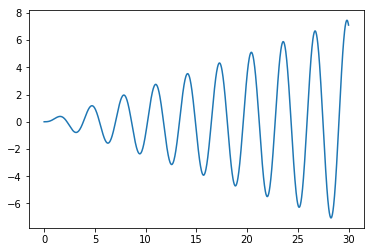

In [22]:
plt.plot(t,U[:,0]);

The [natural frequency](https://en.wikipedia.org/wiki/Natural_frequency) of the equation is $\sqrt{4} = 2$ and so the forcing function is causing the solution to resonate!

## 3. Exercises

**Exercise.** Plot the solution of the first order equation

$$
y' = \cos(y) - \sin(2y) + \frac{1}{1 + t^2}
$$

with $y(0) = 0$ for $t \in [0,20]$.

**Exercise.** Plot the solution to the first order equation

$$
y' = -e^{-y^2} - yt
$$

with $y(0) = 1$ for $t \in [0,10]$.

**Exercise.** Plot the solution of the second order equation

$$
y'' + 2y' + y = \cos(3t)
$$

with $y(0) = 0$, $y'(0) = 1$ for $t \in [0,20]$.

**Exercise.** Plot the solution of the second order equation

$$
y'' - ty' + t^2 y = t
$$

with $y(0) = y'(0) = 0$ for $t \in [0,5]$.